In [1]:
# library for data manipulation and analysis
import pandas as pd

# library for multi-dimensional arrays
import numpy as np

In [2]:
# Load the train and test datasets

#%cd sample_data/
train = pd.read_csv(r"Tonmoy_ANN_train.csv")

In [3]:
# printing column names

print(train.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'City' 'State']


In [4]:
# check data types

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1312 non-null   int64 
 1   Attrition                 1312 non-null   object
 2   BusinessTravel            1312 non-null   object
 3   DailyRate                 1312 non-null   int64 
 4   Department                1312 non-null   object
 5   DistanceFromHome          1312 non-null   int64 
 6   Education                 1312 non-null   int64 
 7   EducationField            1312 non-null   object
 8   EmployeeCount             1312 non-null   int64 
 9   EmployeeNumber            1312 non-null   int64 
 10  EnvironmentSatisfaction   1312 non-null   int64 
 11  Gender                    1312 non-null   object
 12  HourlyRate                1312 non-null   int64 
 13  JobInvolvement            1312 non-null   int64 
 14  JobLevel                

In [5]:
#  count the number of records with missing values

print("*****In the train set*****")
print(train.isna().sum())

*****In the train set*****
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

No     893
Yes    419
Name: Attrition, dtype: int64
No     0.68064
Yes    0.31936
Name: Attrition, dtype: float64


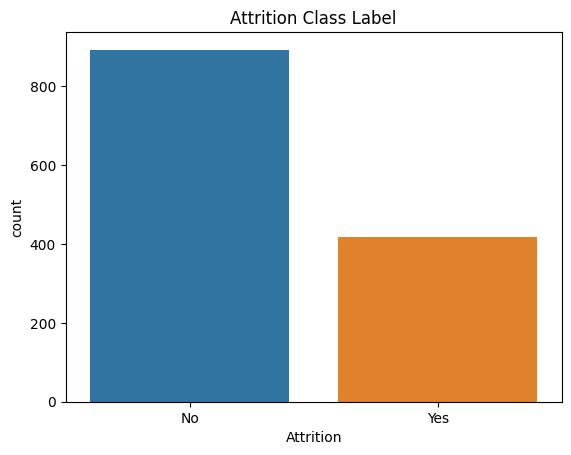

In [6]:
# The chart that shows the number of records per Yes and No value of Attrition variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=train)
plt.title('Attrition Class Label')

# printing the counts of each category of "Attrition" variable

print(train['Attrition'].value_counts())

# print the proportions of each category of "Attrition" variable

print(train['Attrition'].value_counts(normalize=True))

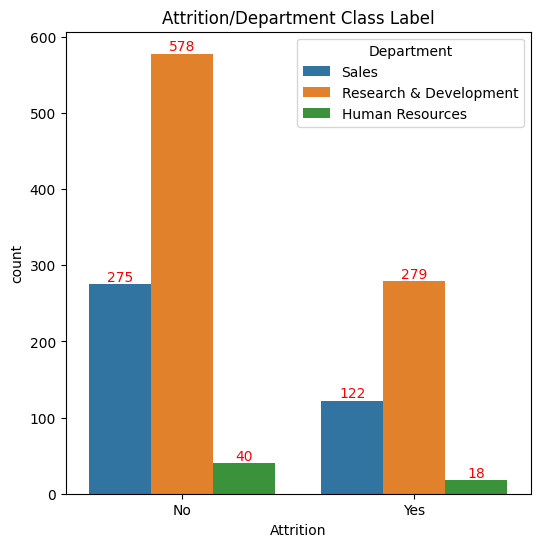

In [7]:
# 3.2.2

plt.figure(figsize=(6,6))
sns.countplot(x='Attrition', hue='Department', data=train)
plt.title('Attrition/Department Class Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()


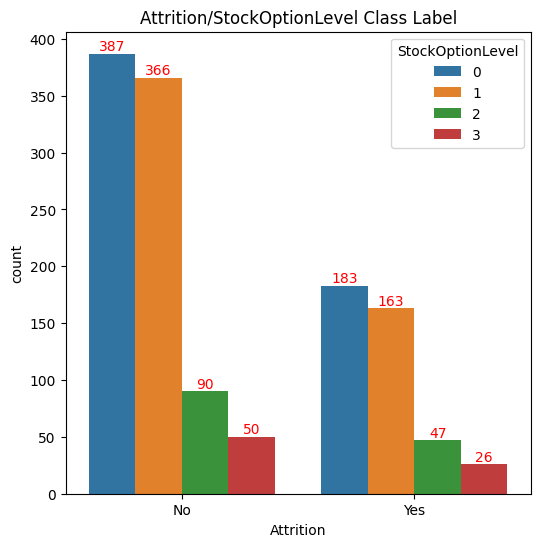

In [8]:
# 3.2.3

plt.figure(figsize=(6,6))
sns.countplot(x='Attrition', hue='StockOptionLevel', data=train)
plt.title('Attrition/StockOptionLevel Class Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

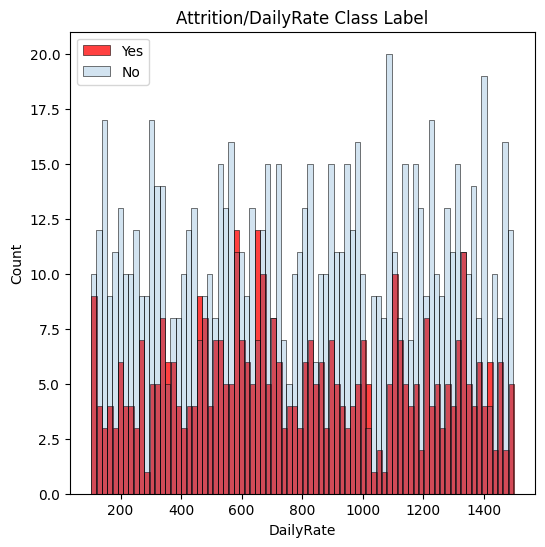

In [9]:
# 3.2.4

plt.figure(figsize=(6,6))
plt.title('Attrition/DailyRate Class Label')
sns.histplot(train[train['Attrition']=='Yes']['DailyRate'], label='Yes', color='r', bins = 80)
sns.histplot(train[train['Attrition']=='No']['DailyRate'], label='No', alpha = 0.2, bins = 80)
plt.legend()
plt.show()

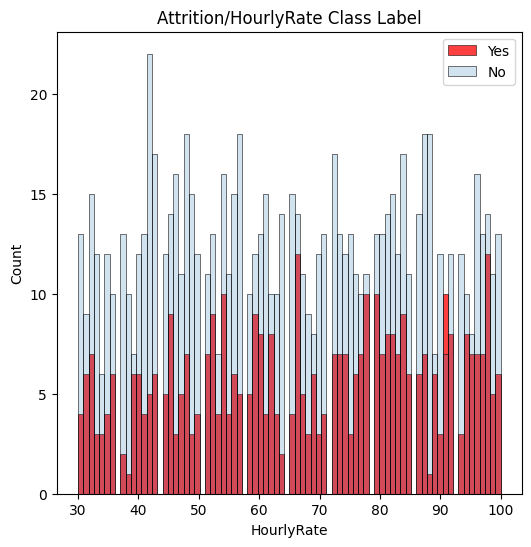

In [10]:
# 3.2.5

plt.figure(figsize=(6,6))
plt.title('Attrition/HourlyRate Class Label')
sns.histplot(train[train['Attrition']=='Yes']['HourlyRate'], label='Yes', color='r', bins = 80)
sns.histplot(train[train['Attrition']=='No']['HourlyRate'], label='No', alpha = 0.2, bins = 80)
plt.legend()
plt.show()

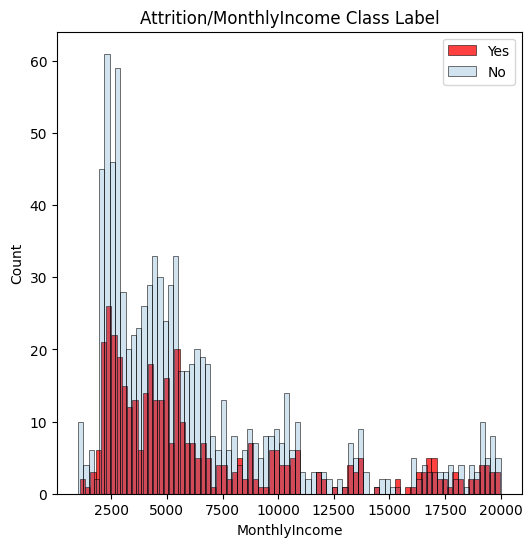

In [11]:
# 3.2.6

plt.figure(figsize=(6,6))
plt.title('Attrition/MonthlyIncome Class Label')
sns.histplot(train[train['Attrition']=='Yes']['MonthlyIncome'], label='Yes', color='r', bins = 80)
sns.histplot(train[train['Attrition']=='No']['MonthlyIncome'], label='No', alpha = 0.2, bins = 80)
plt.legend()
plt.show()

In [12]:
# 4.1 variables that should be removed from analysis

train = train.drop(['EmployeeCount','EmployeeNumber'], axis=1)

In [13]:
# 4.2 Transform all the categorical variables with textual values

ObjList = train.select_dtypes(include = 'object').columns
print (ObjList)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'City', 'State'],
      dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in ObjList:
    train[feat] = le.fit_transform(train[feat].astype(str))

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1312 non-null   int64
 1   Attrition                 1312 non-null   int64
 2   BusinessTravel            1312 non-null   int64
 3   DailyRate                 1312 non-null   int64
 4   Department                1312 non-null   int64
 5   DistanceFromHome          1312 non-null   int64
 6   Education                 1312 non-null   int64
 7   EducationField            1312 non-null   int64
 8   EnvironmentSatisfaction   1312 non-null   int64
 9   Gender                    1312 non-null   int64
 10  HourlyRate                1312 non-null   int64
 11  JobInvolvement            1312 non-null   int64
 12  JobLevel                  1312 non-null   int64
 13  JobRole                   1312 non-null   int64
 14  JobSatisfaction           1312 non-null 

In [15]:
# 4.3 Split variables into independent variables and target variables


X = train.drop(["Attrition"], axis=1)  # independent variable
y = train.Attrition # Target variable

In [16]:
# spliting data into training (70%) and test sets (30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [17]:
# 4.4	Initialize and train an ANN model on train data

from sklearn.neural_network import MLPClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Initializing  ANN classifier
mlp = MLPClassifier (random_state=2)

# Training  ANN classifier
model = mlp.fit(X_train, y_train)

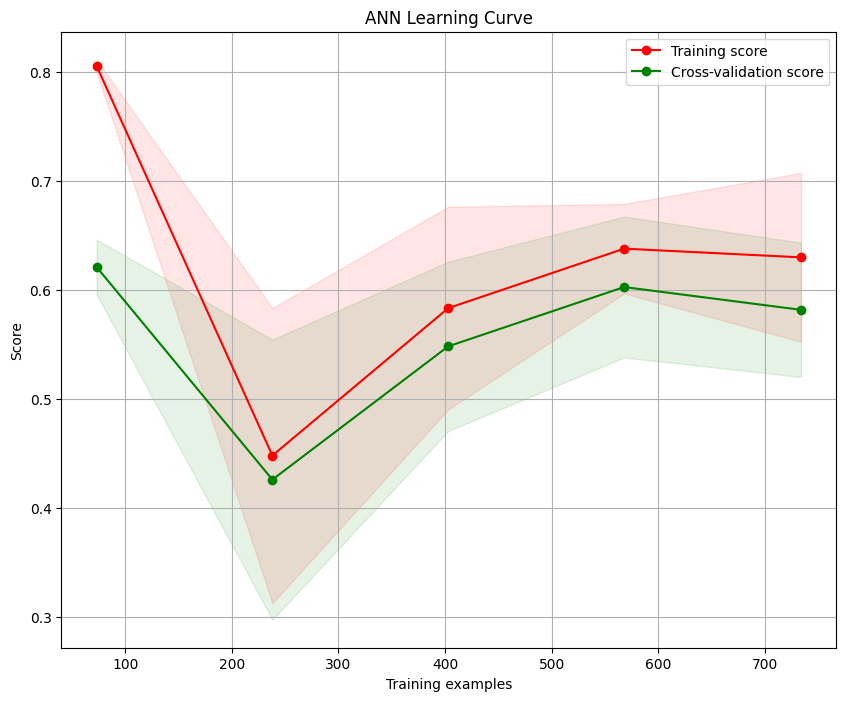

In [18]:
# learning curve of an ANN model on the training data

%pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.estimators.plot_learning_curve(mlp, X_train, y_train, title="ANN Learning Curve", cv=5, figsize=(10, 8))
plt.show()

In [19]:
# 4.5 accuracy of an ANN mode

predicted = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.682741116751269


In [20]:
# 4.6 confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[269   0]
 [125   0]]


In [21]:
# 4.7 classification_report

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       269
           1       0.00      0.00      0.00       125

    accuracy                           0.68       394
   macro avg       0.34      0.50      0.41       394
weighted avg       0.47      0.68      0.55       394



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


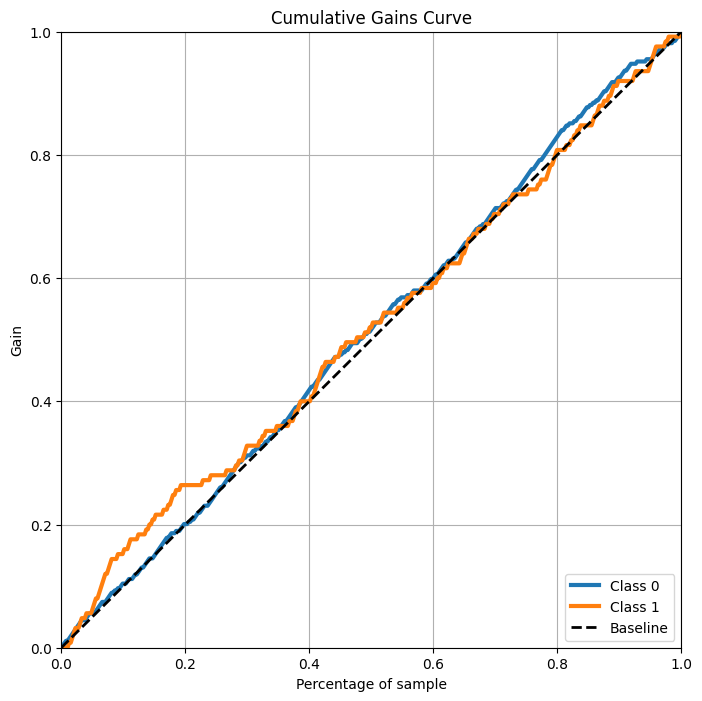

In [22]:
# 4.9 Cumulative Lift Chart

predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8))
plt.show()

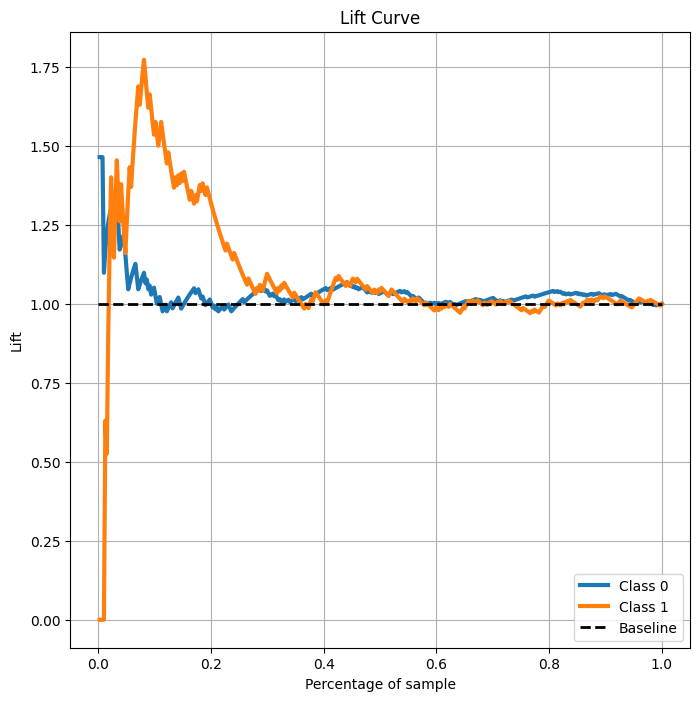

In [23]:
#Lift Chart
skplt.metrics.plot_lift_curve(y_test, predicted_probas,figsize=(8,8))
plt.show()

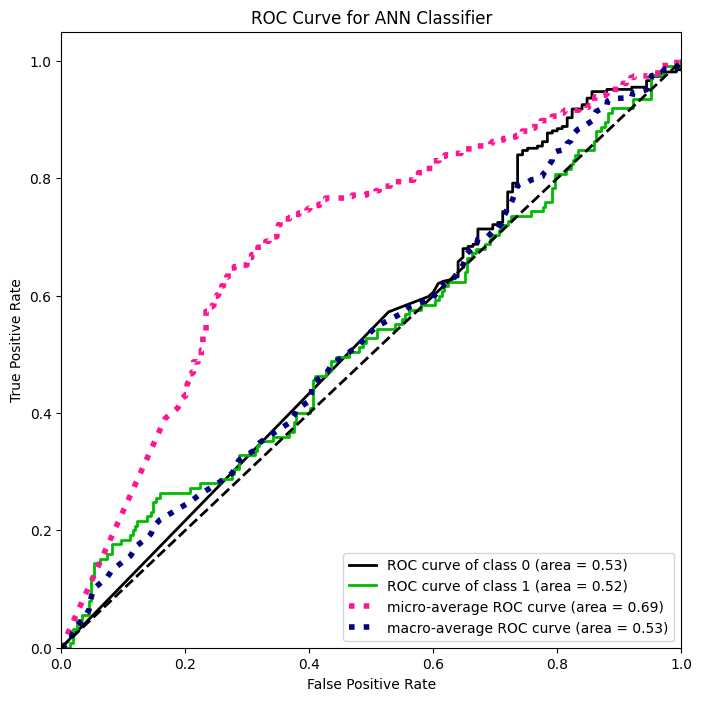

In [24]:
# ROC curve with ROC values

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for ANN Classifier")
plt.show()

In [25]:
# 5.1 Scale and transform train and test data set using StandardScaler()

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

# Train our classifier
model =mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
predicted= model.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,predicted))

Accuracy 0.9289340101522843


In [27]:
# 5.3 classification_report

print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       269
           1       0.89      0.89      0.89       125

    accuracy                           0.93       394
   macro avg       0.92      0.92      0.92       394
weighted avg       0.93      0.93      0.93       394



In [28]:
# 5.2 Initialize and train an ANN model on scaled train data

mlp.fit(X_train, y_train)
predicted = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

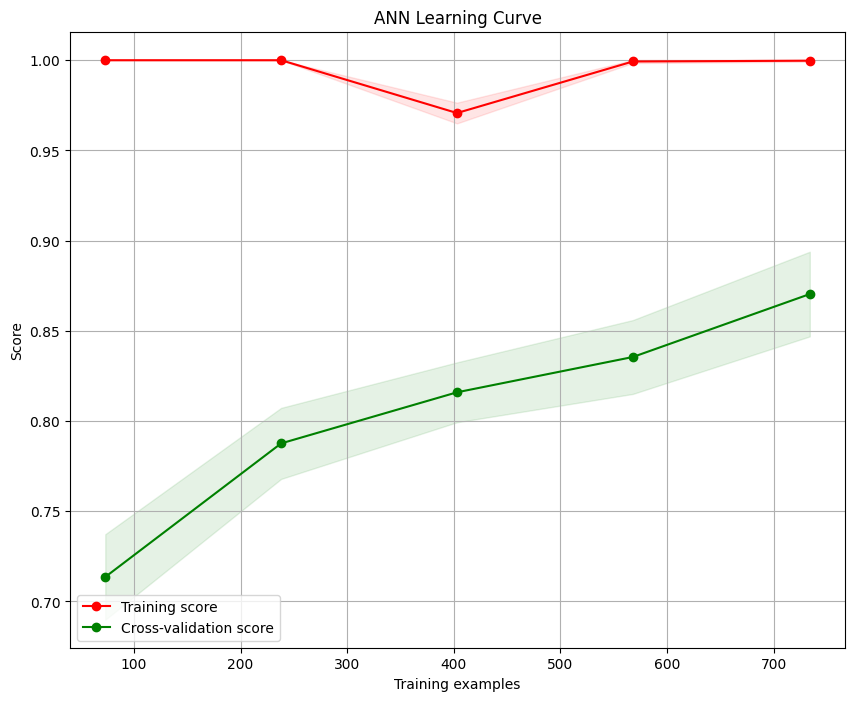

In [29]:
skplt.estimators.plot_learning_curve(mlp, X_train, y_train, title="ANN Learning Curve", cv=5, figsize=(10, 8))
plt.show()

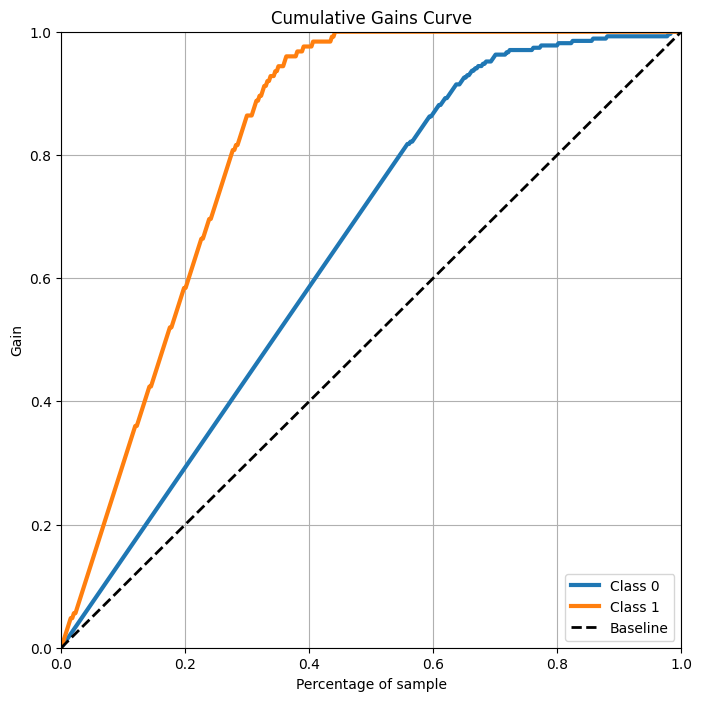

In [30]:
# 5.5 Cumulative Lift Chart

predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8))
plt.show()

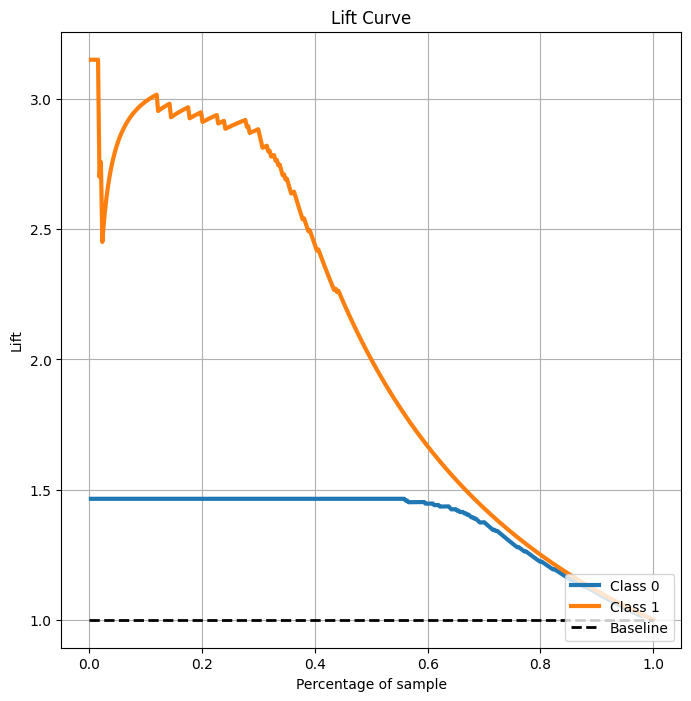

In [31]:
#Lift Chart
skplt.metrics.plot_lift_curve(y_test, predicted_probas,figsize=(8,8))
plt.show()

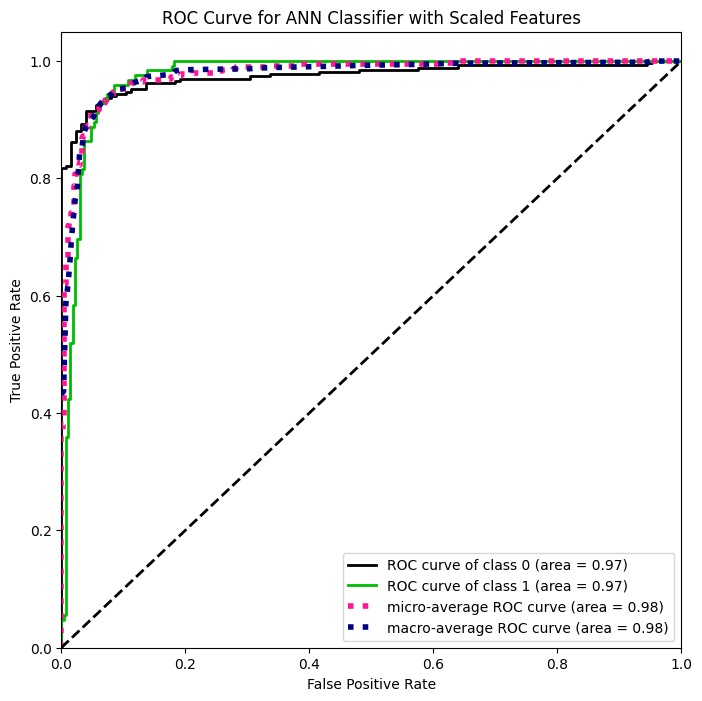

In [32]:
# 5.6 ROC curve with ROC

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for ANN Classifier with Scaled Features")
plt.show()

In [33]:
# 6.1 Perform parameter tuning for an ANN model

from pprint import pprint

print("Parameters currently in use:\n")
pprint(mlp.get_params())

Parameters currently in use:

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [34]:
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid

param_grid = {
    "activation": ["logistic", "tanh", "relu"],
    "learning_rate": ["constant", "adaptive"],
    "max_iter": [200, 400],
    "learning_rate_init": [0.001, 0.01],
    "hidden_layer_sizes": (30,30,30),
    "solver": ["adam", "sgd"]
}


In [35]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid,
                         cv = 3, n_jobs = -1, verbose = 2)
#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=2), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': (30, 30, 30),
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [200, 400], 'solver': ['adam', 'sgd']},
             verbose=2)

In [36]:
# 6.2	Train an ANN model with the best performing parameter settings on the scaled data

mlp = MLPClassifier(**grid_search.best_params_)


model = mlp.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9467005076142132


In [37]:
# 6.3 classification_report

print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       269
           1       0.91      0.93      0.92       125

    accuracy                           0.95       394
   macro avg       0.94      0.94      0.94       394
weighted avg       0.95      0.95      0.95       394



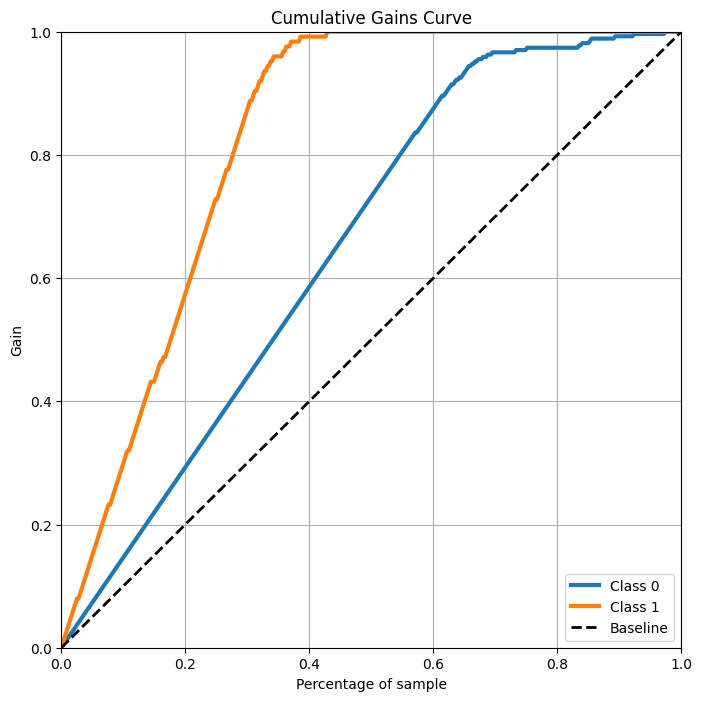

In [38]:
# 6.4 Cumulative Lift Chart

predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8))
plt.show()

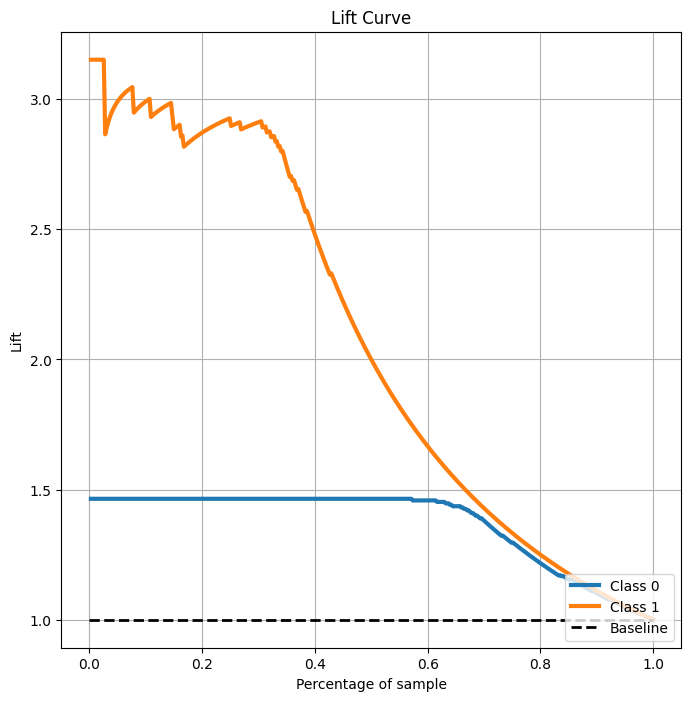

In [39]:
#Lift Chart
skplt.metrics.plot_lift_curve(y_test, predicted_probas,figsize=(8,8))
plt.show()

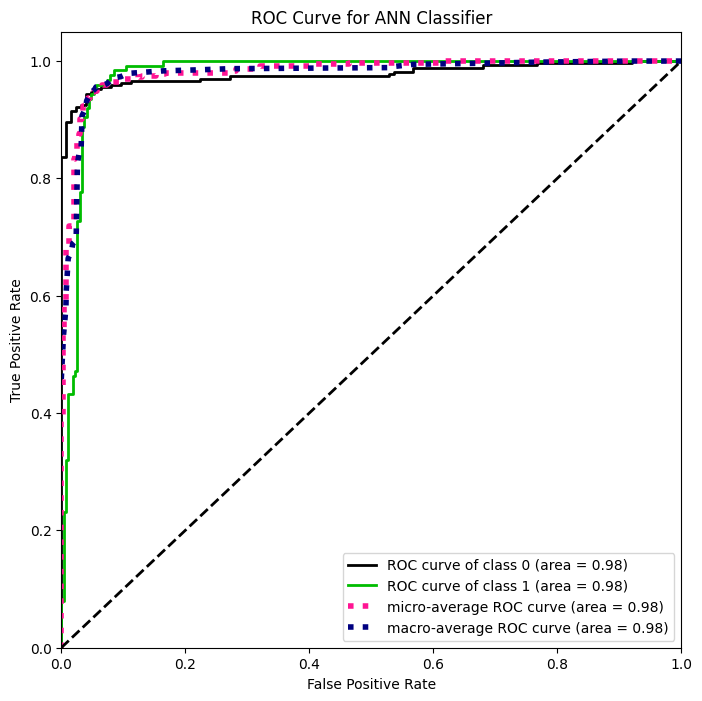

In [40]:
# 6.5 ROC curve of an ANN model

skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for ANN Classifier")
plt.show()